# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [73]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [74]:
def scalize(s):
    s = (s - s.min())/(s.max() - s.min())
    return s

sample_mean = df.temperature.mean()
sample_var = df.temperature.var()
sample_std = df.temperature.std()
sample_mean, sample_var, sample_std
sample_hist = df['temperature'].value_counts().sort_index()
male_hist = df[df.gender=='M'].temperature.value_counts().sort_index()
female_hist = df[df.gender=='F'].temperature.value_counts().sort_index()

statdf = pd.DataFrame(range(0), columns=['samplehist', 'model'])
statdf['samplehist'] = scalize(sample_hist)

x = np.linspace(df.temperature.min(), df.temperature.max(), len(sample_hist))
y = norm.pdf(x, loc=sample_mean, scale=sample_std)
statdf['model'] = y

# sample std/sqrt(sample size) estimates std of the sample distribution of sample means
std_many_sample_means_norm = sample_std/math.sqrt(130)   # hand waving
std_many_sample_means = sample_std/math.sqrt(1)          # hand waving
delta = abs(sample_mean - 98.6)                          # diff between sample mean and 98.6
z_stat_norm = delta/std_many_sample_means_norm           # how many stds fit into our delta
z_stat = delta/std_many_sample_means                     # how many stds fit into our delta


# see: https://dscareercommunity.springboard.com/t/k9zdag/feedback-for-human-body-temperature-eda
conf_int = stats.norm.interval(0.95, loc=sample_mean, scale=std_many_sample_means)
conf_int_norm = stats.norm.interval(0.95, loc=sample_mean, scale=std_many_sample_means_norm)

error_margin = 2 * sample_std                      # two standard deviations


# girls and boys
male_mean = df[df.gender=='M'].temperature.mean()
male_std = df[df.gender=='M'].temperature.std()

female_mean = df[df.gender=='F'].temperature.mean()
female_std = df[df.gender=='F'].temperature.std()

# going for Cohen's D
sex_diff = female_mean - male_mean
pooled_std = math.sqrt((male_std + female_std)/2)
cohens_d = sex_diff/pooled_std

# tables
# https://www.medcalc.org/manual/t-distribution.php
# https://en.wikipedia.org/wiki/Standard_normal_table

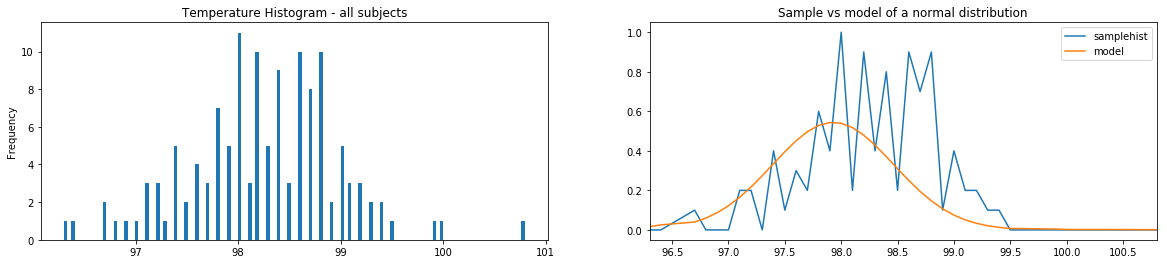

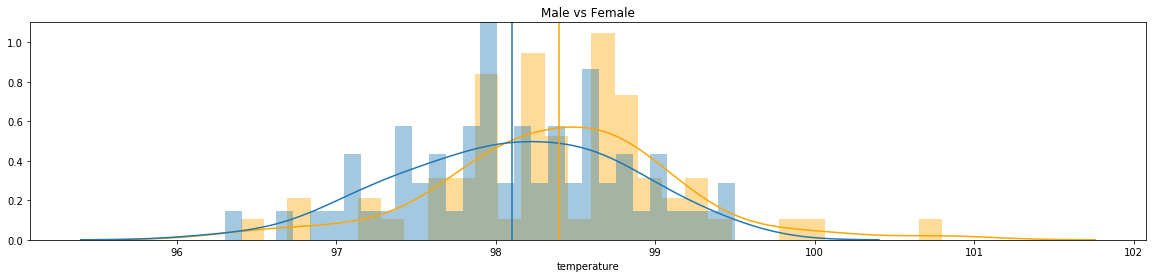

                             sample_mean =  98.2492307692
                              sample_std =  0.733183158039
                                  z_stat =  0.478419651247
                                 p value =  0.181 (~60% of samples fall within 2 std)
                     confidence interval =  (96.812218185403083, 99.686243353058416)
                         margin of error =  1.46636631608 

std of sample means, assuming normal dist =  0.0643044168379
             z_stat, assuming normal dist =  5.45482329236
confidence interval, assuming normal dist =  (98.123196428181629, 98.375265110279869)


In [75]:
def fig1():
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))
    df.temperature.plot(kind='hist', bins=130, ax=axs[0])
    statdf.plot(ax=axs[1])
    axs[0].set_title('Temperature Histogram - all subjects')
    axs[1].set_title('Sample vs model of a normal distribution')


def fig2():
    fig, ax = plt.subplots(1,1,figsize=(20, 4))
    sns.distplot(df[df.gender=='F'].temperature, ax=ax, bins=30, color='orange');
    sns.distplot(df[df.gender=='M'].temperature, ax=ax, bins=30);
    ax.set_title('Male vs Female')


    ax.axvline(df[df.gender=='F'].temperature.mean(), color='orange')
    ax.axvline(df[df.gender=='M'].temperature.mean())

fig1()
plt.show()
fig2()
plt.show()

print '                             sample_mean = ', sample_mean
print '                              sample_std = ', sample_std
print '                                  z_stat = ', z_stat
print '                                 p value = ', .181,'(~60% of samples fall within 2 std)'
print '                     confidence interval = ', conf_int
print '                         margin of error = ', error_margin, '\n'

print 'std of sample means, assuming normal dist = ', std_many_sample_means_norm
print '             z_stat, assuming normal dist = ', z_stat_norm
print 'confidence interval, assuming normal dist = ', conf_int_norm


* Q1) Is the distribution of body temperatures normal?
     - A normal distribution is non-zero for all real numbers.  If that were true here, there would be at least some people with absurdly high or low temperatures. Clearly, body temperature is not arranged in a normal distribution. On the contrary, the range of possible body temperatures is narrow for living people and even narrower for healthy people.


* Q2) Is the sample size large? Are the observations independent?
     - The kinds of things that determine variablity in body temperature in healthy people, which include age, diet, fitness, sex, sleep patterns, seasons and emotional state, are fairly easy to account for.  Although they are not all accounted for here, let's assume that they could be (for example, by ensuring that those factors are symmetrically distributed in the sample population). If that were done, 130 data samples would be enough to provide a reasonable model of a larger population.
     - Male and female body temperature do not, in general, depend on one another.


* Q3) Is the true population mean really 98.6 degrees F?
     - The mean of this sample (~98.25) was over 5 standard deviations below 98.6, if we make the assumption that it's a normal distribution.  That may suggest that the true population mean is lower.  However, the range of healthy temperatures is larger than the difference between the sample mean and 98.6, and both means fall within that range.  This suggests, as the plot also suggests, that the exact mean is not a critical number for the phenomenon of body temperature.
     - A one sample test is appropriate for this question because there are not two distinct groups being considered.
     - A Z statistic <i>should</i> be usable in this case because there are more than 30 data points.  Since this is not a normal distribution, assuming it is one leads to perverse results.  If, for example, we estimate the population std by dividing the sample std by the sqrt(sample size), we will find that as the sample size grows the estimate for the population std will shrink to be very very small, even though we know that niether the range nor the distribution of body temperatures is very different from this sample and can reasonably assume that the std of the population will also be roughly similar to the std of this sample.  If this were actually a normal distribution (meaning some quantity for all real numbers), there would be values out at the tails that would make the std bigger and justify the reducing step performed by dividing by the sqrt(sample size) to scale the estimate of the population std. 
     - A T statistic suffers from the same problem.  A T distribution also assumes values for all real numbers.  The only difference is that it has fatter tails.  


* Q4) At what temperature is someone normal?
     - Using the sample mean to generate a Z-statistic, the 95% confidence interval for these temperature values is (96.81, 99.68), which might be used as a standard for what is normal.
     
 
* Q5) Is there a significant difference between males and females in normal temperature?
     - Cohen's D is commonly used to compare two populations.  In this case, a Cohen's D of .34, indicating that the male and female means are a third of an STD away from each other, is a medium sized effect. 



The story of this dataset is all about what happens outside of it's narrow range.  People die.  If that were not so, it might be that the underlying processes responsible for body temperature variation might produce values that are normally distributed.  In that case, for example, a very high fever might be part of a process that could be considered normal, if rare.  But those tail values, high or low, never occur because we can't survive them.  

It also seems to be the case in this data that the specific mean values are not very important.  That is, within the narrow range of human body temperatures, there is a fairly wide range of temperatures that can be considered normal and healthy.  

Men and women differ slighly on average.  More interesting is that women are more varied about the mean.  That is, women above the mean are hotter than men above the mean, while women who are below the mean are cooler than men below the mean.


